# Analyzing Risk Score and Its Impact on Readmissions

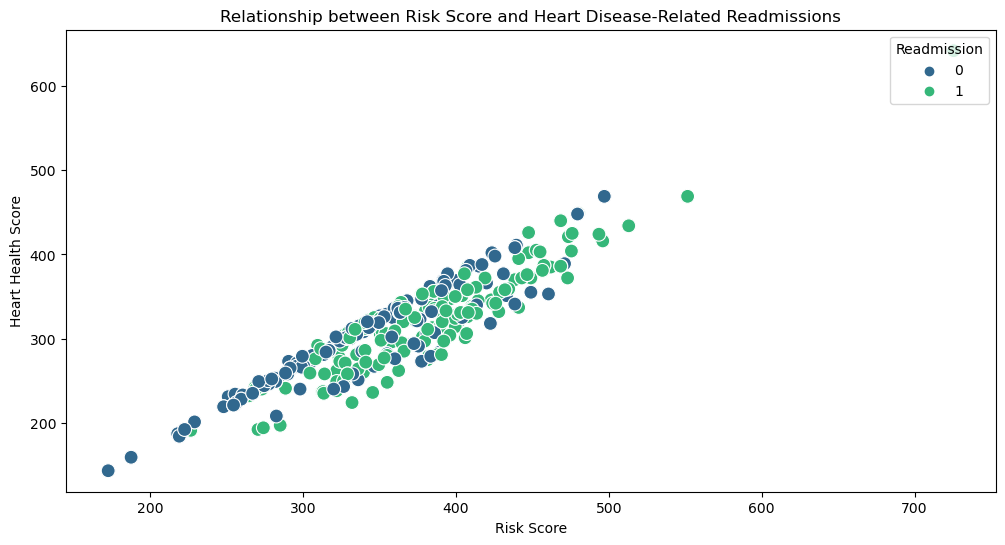

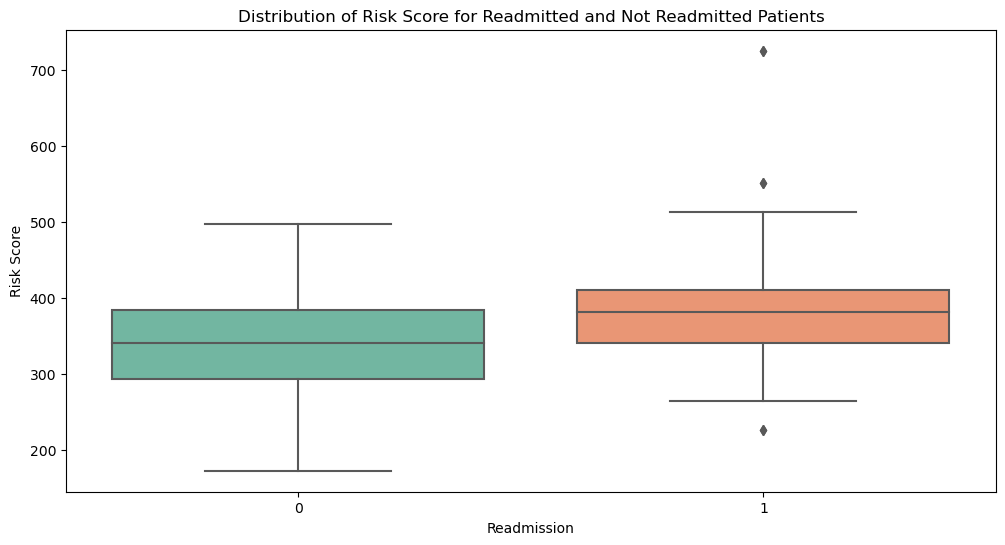

Percentage of readmissions in high-risk group: 61.11%


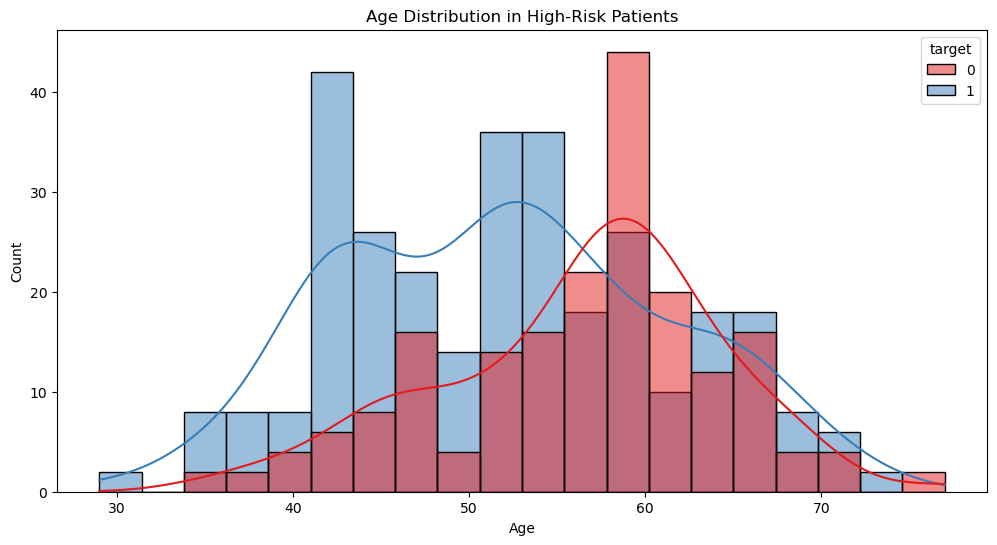

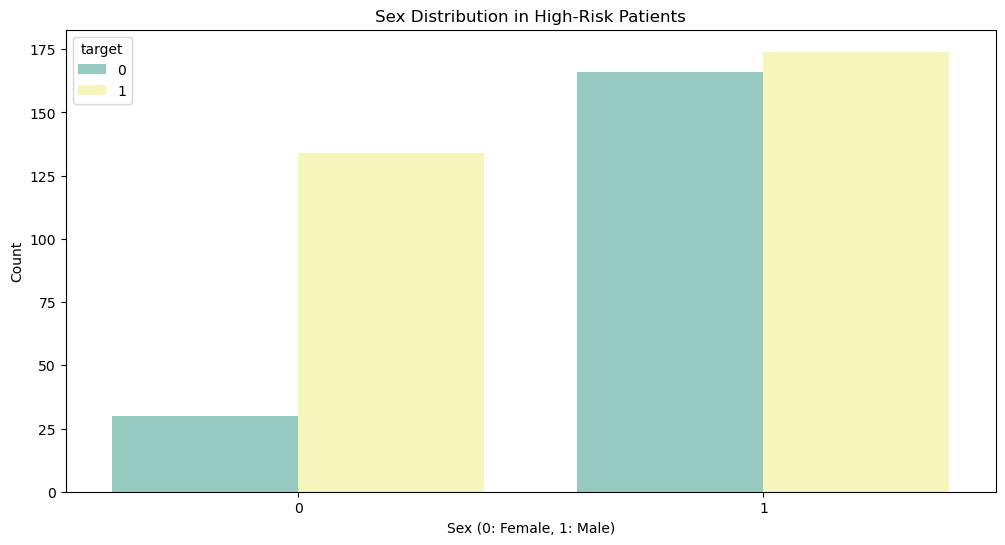

There is a significant difference in age between high-risk and low-risk patients.
There is a significant association between sex and readmission in high-risk patients.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats 

# Load the dataset
file_path = "heart_disease_dataset_with_new_features.csv"
df = pd.read_csv(file_path)

# Calculate Risk Score
df['risk_score'] = df['heart_health_score'] + df['chest_pain_level'] + df['age'] * 0.5

# Set a larger default figure size
plt.rcParams['figure.figsize'] = (12, 6)

# Scatter plot
plt.figure()
sns.scatterplot(x='risk_score', y='heart_health_score', hue='target', data=df, palette='viridis', s=100)
plt.title('Relationship between Risk Score and Heart Disease-Related Readmissions')
plt.xlabel('Risk Score')
plt.ylabel('Heart Health Score')
plt.legend(title='Readmission', loc='upper right')
plt.show()

# Boxplot
plt.figure()
sns.boxplot(x='target', y='risk_score', data=df, palette='Set2')
plt.title('Distribution of Risk Score for Readmitted and Not Readmitted Patients')
plt.xlabel('Readmission')
plt.ylabel('Risk Score')
plt.show()

# Identify high-risk patients using a predefined threshold
risk_threshold = 300
high_risk_patients = df[df['risk_score'] > risk_threshold]

# Calculate the percentage of readmissions in the high-risk group
readmission_percentage_high_risk = (high_risk_patients['target'].sum() / len(high_risk_patients)) * 100

print(f"Percentage of readmissions in high-risk group: {readmission_percentage_high_risk:.2f}%")


# Check the distribution of age, sex, and other relevant features in high-risk patients.

# Age distribution
plt.figure()
sns.histplot(x='age', hue='target', data=high_risk_patients, bins=20, kde=True, palette='Set1')
plt.title('Age Distribution in High-Risk Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Conduct statistical test for age
t_stat_age, p_value_age = ttest_ind(high_risk_patients['age'], df['age'])

if p_value_age < 0.05:
    print("There is a significant difference in age between high-risk patients and the overall population.")

# Sex distribution
plt.figure()
sns.countplot(x='sex', hue='target', data=high_risk_patients, palette='Set3')
plt.title('Sex Distribution in High-Risk Patients')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

# Conduct statistical test for sex
contingency_table_sex = pd.crosstab(high_risk_patients['sex'], high_risk_patients['target'])
chi2_stat_sex, p_value_sex, _, _ = stats.chi2_contingency(contingency_table_sex)

low_risk_patients = df[df['risk_score'] <= risk_threshold]
t_stat, p_value = ttest_ind(high_risk_patients['age'], low_risk_patients['age'])

if p_value < 0.05:
    print("There is a significant difference in age between high-risk and low-risk patients.")
else:
    print("There is no significant difference in age between high-risk and low-risk patients.")

if p_value_sex < 0.05:
    print("There is a significant association between sex and readmission in high-risk patients.")

